In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
%%shell
jupyter nbconvert --to html /content/math_key.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


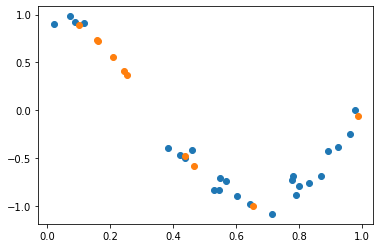

In [ ]:
#data = np.load('data.npz') # if you do this on the local machine
data = np.load('/content/drive/MyDrive/lessons/data.npz') # if you do this on Google colab

X_train = data['X_train']
y_train = data['y_train']

X_test = data['X_test']
y_test = data['y_test']

X_ref = data['X_ref']
y_ref = data['y_ref']

plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
degree = 15

[ 0.00000000e+00 -9.09730085e+03  3.28807129e+05 -6.10177897e+06
  6.72218872e+07 -4.77215282e+08  2.30742234e+09 -7.88729851e+09
  1.95077351e+10 -3.53184213e+10  4.68436701e+10 -4.50131003e+10
  3.05047099e+10 -1.38258314e+10  3.76133828e+09 -4.64448789e+08]
Mean squared error on test: 117.0195


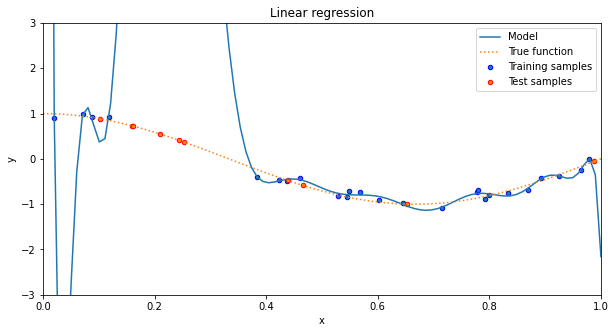

In [ ]:
poly = PolynomialFeatures(degree=degree, include_bias=True)
linear = [TODO]
pipeline = Pipeline([("polynomial_features", poly), ("linear_regression", linear)])
pipeline.fit(X_train[:, np.newaxis], y_train)
print(linear.coef_)

y_pred = pipeline.predict(X_test[:, np.newaxis])
print('Mean squared error on test: %.4f'
      % mean_squared_error(y_test, y_pred))
plt.figure(figsize=(10, 5))

ax = plt.subplot(1, 1, 1)
plt.plot(X_ref, pipeline.predict(X_ref[:, np.newaxis]), label="Model")
plt.plot(X_ref, y_ref, label="True function",ls=':')
plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Training samples")
plt.scatter(X_test, y_test, edgecolor='r', s=20, label="Test samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-3, 3))
plt.legend(loc="best")
plt.title("Linear regression")
plt.show()

**Problem 1:**
Is this model underfitted or over fitted?


Use Ridge regression to regularize the model, use parameters alpha =.01, normalize = True


(https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)


[ 0.         -3.32479102 -0.83888826  0.41782985  0.87570681  0.94099323
  0.82161658  0.62377506  0.40514668  0.19773109  0.01868263 -0.12375805
 -0.22669498 -0.29034577 -0.31664047 -0.30835174]
Mean squared error on test: 0.0172


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


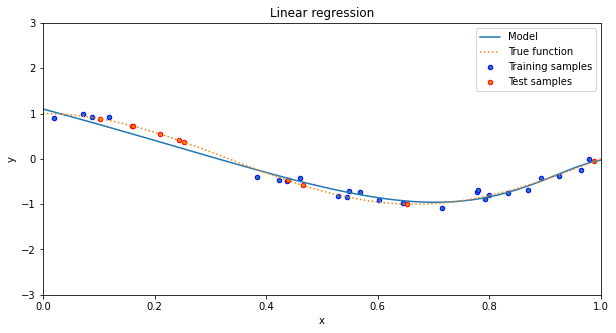

In [ ]:
poly = PolynomialFeatures(degree=degree, include_bias=True)
linear = [TODO]
pipeline = Pipeline([("polynomial_features", poly), ("linear_regression", linear)])
pipeline.fit(X_train[:, np.newaxis], y_train)
print(linear.coef_)

y_pred = pipeline.predict(X_test[:, np.newaxis])
print('Mean squared error on test: %.4f'
      % mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
plt.plot(X_ref, pipeline.predict(X_ref[:, np.newaxis]), label="Model")
plt.plot(X_ref, y_ref, label="True function",ls=':')
plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Training samples")
plt.scatter(X_test, y_test, edgecolor='r', s=20, label="Test samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-3, 3))
plt.legend(loc="best")
plt.title("Linear regression")
plt.show()

**Problem 2:**
Is this model underfitted or over fitted or regularized?  

Use Lasso regression to regularize the model, use parameters alpha =.01, max_iter=1e5 normalize = True


(https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


[ 0.         -2.47715008 -0.          0.          0.          0.
  0.          1.7676334   0.          0.          0.          0.
  0.          0.          0.          0.        ]
Mean squared error on test: 0.0717


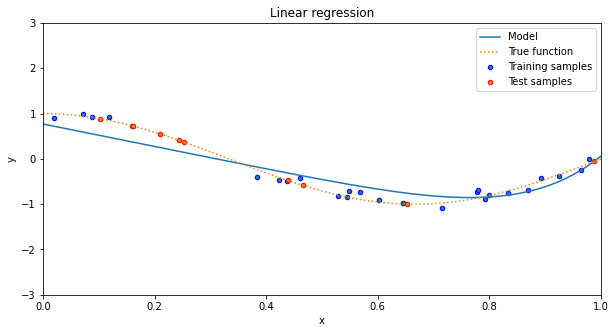

In [ ]:
poly = PolynomialFeatures(degree=degree, include_bias=True)
linear = [TODO]
pipeline = Pipeline([("polynomial_features", poly), ("linear_regression", linear)])
pipeline.fit(X_train[:, np.newaxis], y_train)
print(linear.coef_)

y_pred = pipeline.predict(X_test[:, np.newaxis])
print('Mean squared error on test: %.4f'
      % mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
plt.plot(X_ref, pipeline.predict(X_ref[:, np.newaxis]), label="Model")
plt.plot(X_ref, y_ref, label="True function",ls=':')
plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Training samples")
plt.scatter(X_test, y_test, edgecolor='r', s=20, label="Test samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-3, 3))
plt.legend(loc="best")
plt.title("Linear regression")
plt.show()

**Problem 3:**
Is this model underfitted or over fitted or regularized? 



